<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/main_ar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install import_ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2975 sha256=9a9009b7f9bf494117556d22ef9c5692aae54e44cc184bc3a3243a5995a05d98
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
!wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/defs_common.ipynb -O "defs_common.ipynb"
from defs_common import *

--2020-01-05 13:58:00--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/defs_common.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6564 (6.4K) [text/plain]
Saving to: ‘defs_common.ipynb’

defs_common.ipynb   100%[===================>]   6.41K  --.-KB/s    in 0s      

2020-01-05 13:58:00 (69.3 MB/s) - ‘defs_common.ipynb’ saved [6564/6564]

importing Jupyter notebook from defs_common.ipynb


In [0]:
import pandas as pd
import numpy as np
import cv2 as cv

In [119]:
!cp "./drive/My Drive/sudoku_acquisition_output.bz2" "./sudoku_acquisition_output.bz2"
acquisition_output = pd.read_pickle("./sudoku_acquisition_output.bz2")
acquisition_output

input_image  ... training
input_filename                                                                       ...         
./v2_train/image1059.jpg          [[[172, 171, 159], [174, 170, 165], [174, 170,...  ...     True
./v2_train/image26.jpg            [[[120, 130, 131], [119, 129, 130], [117, 127,...  ...     True
./v2_train/image41.jpg            [[[142, 162, 150], [142, 162, 150], [142, 162,...  ...     True
./v2_train/image19.jpg            [[[148, 166, 154], [148, 166, 154], [147, 165,...  ...    False
./v2_train/image22.jpg            [[[149, 166, 156], [149, 166, 156], [149, 166,...  ...    False
...                                                                             ...  ...      ...
./dataset/009000800/IMG_8812.JPG  [[[93, 98, 90], [95, 96, 95], [93, 95, 94], [9...  ...     True
./dataset/009000800/IMG_8817.JPG  [[[195, 195, 197], [196, 194, 200], [195, 196,...  ...     True
./dataset/009000800/IMG_8822.JPG  [[[15, 15, 14], [15, 15, 17], [14, 14, 16], [1...  ...     True
./dataset/009000800/IMG_8810.JPG  [[[117, 119, 113], [118, 118, 115], [117, 118,...  ...     True
./dataset/009000800/IMG_8824.JPG  [[[156, 139, 117], [156, 139, 120], [155, 139,...  ...     True

[356 rows x 3 columns]

In [7]:
!cp "./drive/My Drive/sudoku_transformation_output.bz2" "./sudoku_transformation_output.bz2"
transformation_output = pd.read_pickle("./sudoku_transformation_output.bz2")
transformation_output

transform_contour_source  ...                                    transform_image
input_filename                                                                     ...                                                   
./v2_train/image1059.jpg           [[64, 151], [66, 379], [444, 378], [434, 152]]  ...  [[[89, 78, 76], [71, 59, 58], [68, 55, 55], [6...
./v2_train/image1006.jpg             [[57, 64], [50, 356], [456, 355], [445, 64]]  ...  [[[105, 69, 40], [85, 51, 24], [91, 58, 34], [...
./v2_train/image1082.jpg           [[55, 110], [58, 420], [463, 413], [469, 110]]  ...  [[[100, 91, 80], [68, 59, 51], [67, 60, 53], [...
./v2_train/image204.jpg              [[97, 72], [95, 474], [407, 477], [399, 65]]  ...  [[[85, 79, 47], [70, 64, 35], [66, 60, 34], [6...
./v2_train/image206.jpg             [[100, 51], [97, 491], [452, 485], [453, 49]]  ...  [[[57, 57, 51], [54, 54, 48], [55, 54, 50], [5...
...                                                                           ...  ...                                                ...
./dataset/009000800/IMG_8806.JPG   [[57, 102], [38, 385], [435, 383], [413, 110]]  ...  [[[104, 103, 109], [78, 79, 84], [89, 90, 95],...
./dataset/009000800/IMG_8818.JPG  [[98, 115], [102, 379], [473, 367], [435, 108]]  ...  [[[109, 104, 100], [91, 85, 80], [92, 86, 81],...
./dataset/009000800/IMG_8813.JPG  [[110, 179], [47, 388], [385, 382], [379, 131]]  ...  [[[140, 140, 148], [131, 133, 141], [136, 139,...
./dataset/009000800/IMG_8819.JPG  [[124, 39], [116, 381], [444, 357], [399, 128]]  ...  [[[96, 84, 91], [105, 93, 99], [97, 86, 92], [...
./dataset/009000800/IMG_8824.JPG   [[52, 162], [76, 429], [420, 426], [447, 166]]  ...  [[[153, 146, 150], [94, 88, 92], [86, 80, 84],...

[162 rows x 4 columns]

In [45]:
!cp "./drive/My Drive/sudoku_solve_output.bz2" "./sudoku_solve_output.bz2"
solve_output = pd.read_pickle("./sudoku_solve_output.bz2")
solve_output

solve_input                                       solve_output
input_filename                                                                                                                        
./v2_train/image1059.jpg          [[0, 3, 0, 1, 4, 8, 2, 0, 0], [0, 4, 2, 0, 0, ...  [[5, 3, 7, 1, 4, 8, 2, 6, 9], [1, 4, 2, 6, 5, ...
./v2_train/image1006.jpg          [[0, 9, 5, 8, 0, 0, 0, 0, 0], [2, 0, 0, 3, 0, ...  [[3, 9, 5, 8, 4, 1, 6, 7, 2], [2, 6, 8, 3, 9, ...
./v2_train/image1082.jpg          [[3, 4, 7, 0, 5, 1, 0, 0, 0], [0, 1, 9, 0, 0, ...  [[3, 4, 7, 2, 5, 1, 8, 6, 9], [2, 1, 9, 7, 6, ...
./v2_train/image204.jpg           [[0, 1, 3, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 4, ...  [[4, 1, 3, 6, 5, 8, 2, 9, 7], [5, 7, 6, 9, 4, ...
./v2_train/image206.jpg           [[0, 3, 0, 0, 2, 0, 0, 4, 0], [1, 0, 9, 7, 0, ...  [[7, 3, 5, 9, 2, 8, 1, 4, 6], [1, 2, 9, 7, 4, ...
...                                                                             ...                                                ...
./dataset/009000800/IMG_8816.JPG  [[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...  [[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ...
./dataset/009000800/IMG_8806.JPG  [[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...  [[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ...
./dataset/009000800/IMG_8818.JPG  [[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...  [[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ...
./dataset/009000800/IMG_8813.JPG  [[0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, ...  [[1, 4, 2, 5, 9, 6, 8, 7, 3], [5, 6, 9, 7, 3, ...
./dataset/009000800/IMG_8824.JPG  [[0, 0, 9, 0, 0, 0, 8, 0, 0], [0, 6, 0, 0, 0, ...  [[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ...

[149 rows x 2 columns]

In [120]:
dataset = acquisition_output.join(transformation_output, how="inner").join(solve_output, how="inner")
dataset

input_image  ...                                       solve_output
input_filename                                                                       ...                                                   
./v2_train/image1059.jpg          [[[172, 171, 159], [174, 170, 165], [174, 170,...  ...  [[5, 3, 7, 1, 4, 8, 2, 6, 9], [1, 4, 2, 6, 5, ...
./v2_train/image1006.jpg          [[[165, 126, 97], [166, 128, 99], [166, 127, 9...  ...  [[3, 9, 5, 8, 4, 1, 6, 7, 2], [2, 6, 8, 3, 9, ...
./v2_train/image1082.jpg          [[[182, 175, 169], [184, 177, 170], [185, 178,...  ...  [[3, 4, 7, 2, 5, 1, 8, 6, 9], [2, 1, 9, 7, 6, ...
./v2_train/image204.jpg           [[[154, 146, 93], [158, 150, 103], [163, 154, ...  ...  [[4, 1, 3, 6, 5, 8, 2, 9, 7], [5, 7, 6, 9, 4, ...
./v2_train/image206.jpg           [[[88, 93, 86], [90, 94, 87], [95, 98, 91], [9...  ...  [[7, 3, 5, 9, 2, 8, 1, 4, 6], [1, 2, 9, 7, 4, ...
...                                                                             ...  ...                                                ...
./dataset/009000800/IMG_8816.JPG  [[[178, 178, 150], [159, 156, 132], [140, 138,...  ...  [[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ...
./dataset/009000800/IMG_8806.JPG  [[[98, 98, 76], [138, 136, 117], [170, 167, 14...  ...  [[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ...
./dataset/009000800/IMG_8818.JPG  [[[97, 87, 73], [97, 85, 73], [97, 86, 74], [9...  ...  [[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ...
./dataset/009000800/IMG_8813.JPG  [[[92, 94, 88], [94, 94, 90], [93, 94, 89], [9...  ...  [[1, 4, 2, 5, 9, 6, 8, 7, 3], [5, 6, 9, 7, 3, ...
./dataset/009000800/IMG_8824.JPG  [[[156, 139, 117], [156, 139, 120], [155, 139,...  ...  [[1, 4, 9, 5, 6, 7, 8, 2, 3], [5, 6, 2, 3, 9, ...

[149 rows x 9 columns]

# Introduction

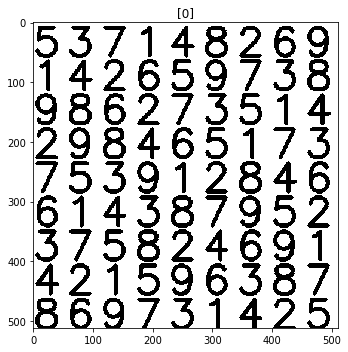

In [54]:
def draw_digit(image, digit, i_row, i_col, n_rows=9, n_cols=9, font=cv.FONT_HERSHEY_SIMPLEX, color=(0, 0, 0), thickness=0.01):
  image_height, image_width = image.shape[:2]
  cell_width = int(image_width / n_rows)
  cell_height = int(image_height / n_cols)
  cell_left = int((i_col / n_cols) * image_width)
  cell_top = int((i_row / n_rows) * image_height)
  cell_right = cell_left + cell_width
  cell_bottom = cell_top + cell_height
  font_scale = cell_height / 25
  thickness = int(image_height * thickness)
  cv.putText(image, str(digit), (cell_left, cell_bottom), font, font_scale, color, thickness)

image = np.ones((512, 512, 3))
for i_row in range(9):
  for i_col in range(9):
    draw_digit(image, dataset["solve_output"][0][i_row][i_col], i_row, i_col)
show_images([image])

In [0]:
def draw_solution(image, solve_input, solve_output, n_rows=9, n_cols=9):
  for i_row in range(n_rows):
    for i_col in range(n_cols):
      if solve_input[i_row][i_col] > 0:
        continue
      draw_digit(image, solve_output[i_row][i_col], i_row, i_col)
  return image

dataset["ar_transform_image"] = [image.copy() for image in dataset["transform_image"]]
dataset["ar_transform_image"] = [draw_solution(x, y, z) for x, y, z in zip(dataset["ar_transform_image"], dataset["solve_input"], dataset["solve_output"])]

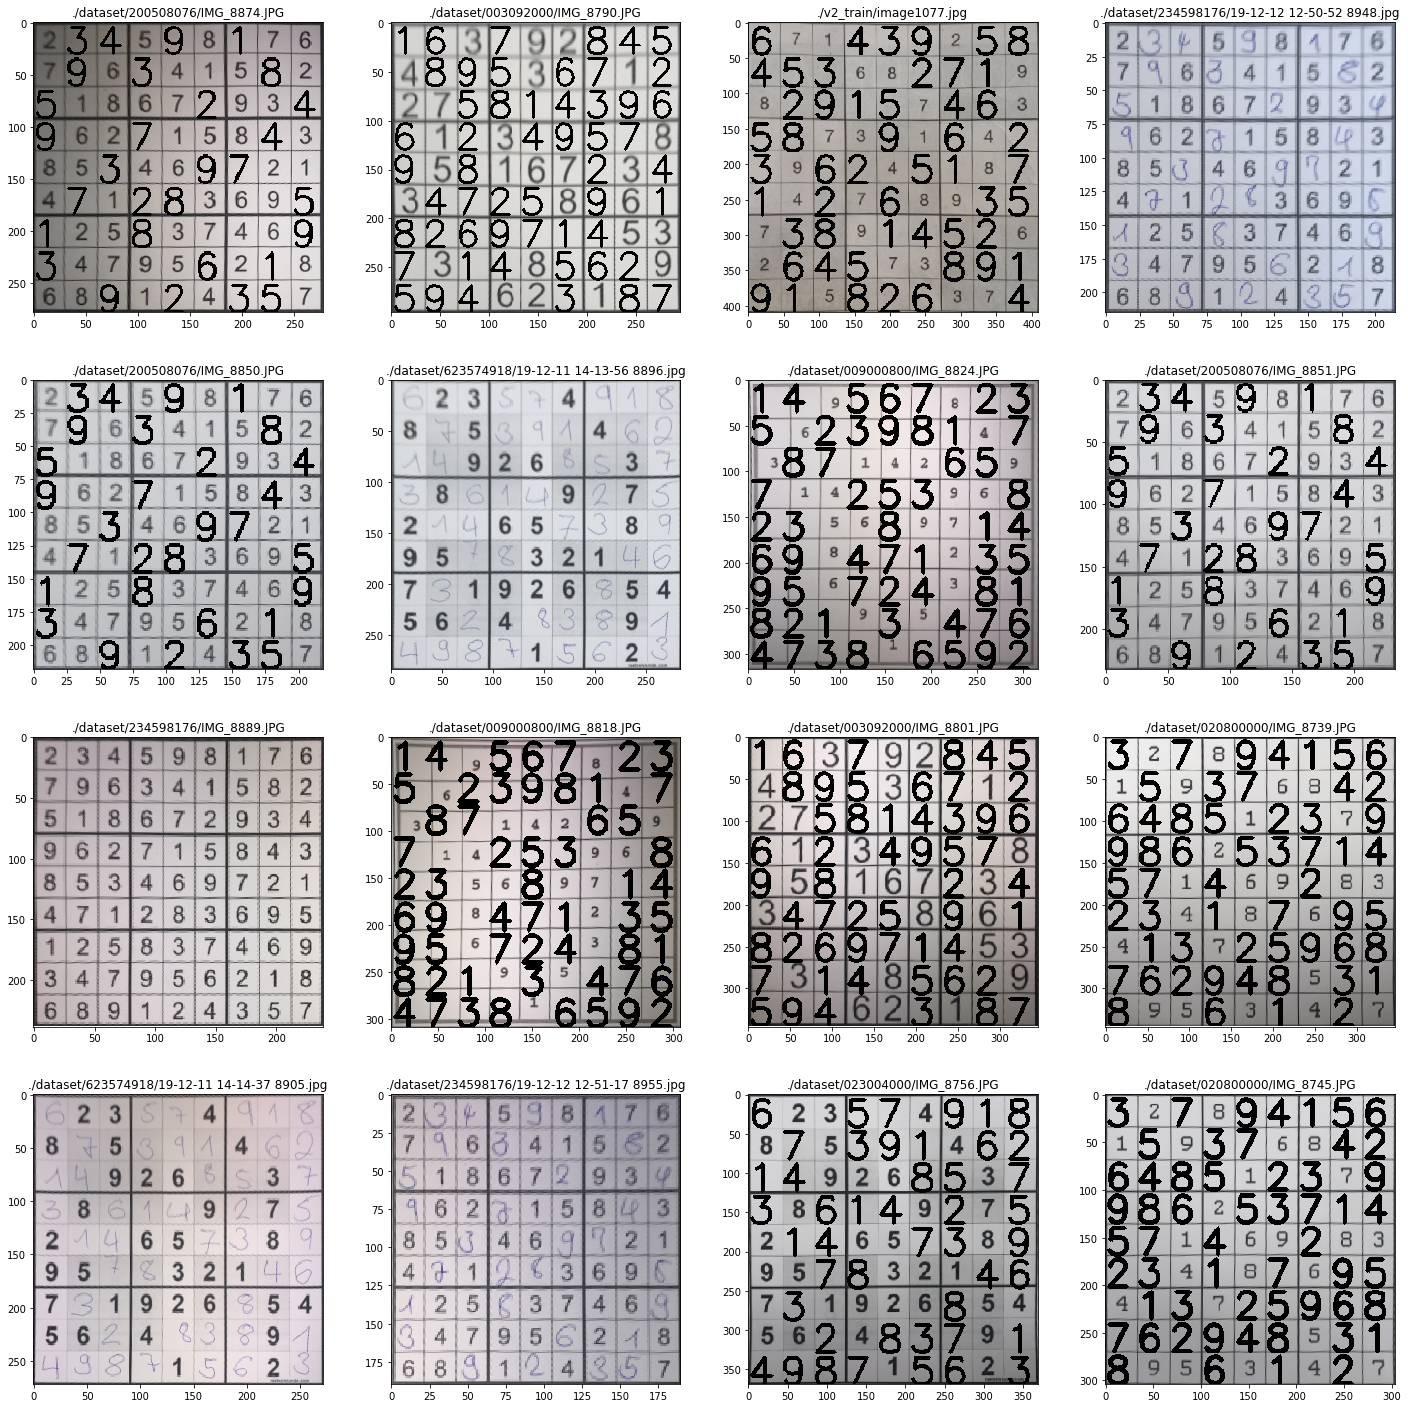

In [124]:
show_images(dataset["ar_transform_image"], dataset.index, n_samples=16)

In [0]:
def do_magic(input_image, transform_contour_source, transform_contour_target, ar_transform_image):
  input_image = input_image.copy()
  transform_contour_source = transform_contour_source.astype("float32")
  transform_contour_target = transform_contour_target.astype("float32")
  M = cv.getPerspectiveTransform(transform_contour_target, transform_contour_source)
  height, width = input_image.shape[:2]
  ar_input_image = cv.warpPerspective(ar_transform_image, 
                                      M, (width, height), 
                                      dst=input_image, 
                                      borderMode=cv.BORDER_TRANSPARENT)
  return ar_input_image

#dataset["ar_transform_matrix"] = [cv.getPerspectiveTransform(src.astype("float32"), dst.astype("float32")) for src, dst in zip(dataset["transform_contour_source"], dataset["transform_contour_target"])]
dataset["ar_input_image"] = [do_magic(*x) for x in zip(dataset["input_image"], dataset["transform_contour_source"], dataset["transform_contour_target"], dataset["ar_transform_image"])]

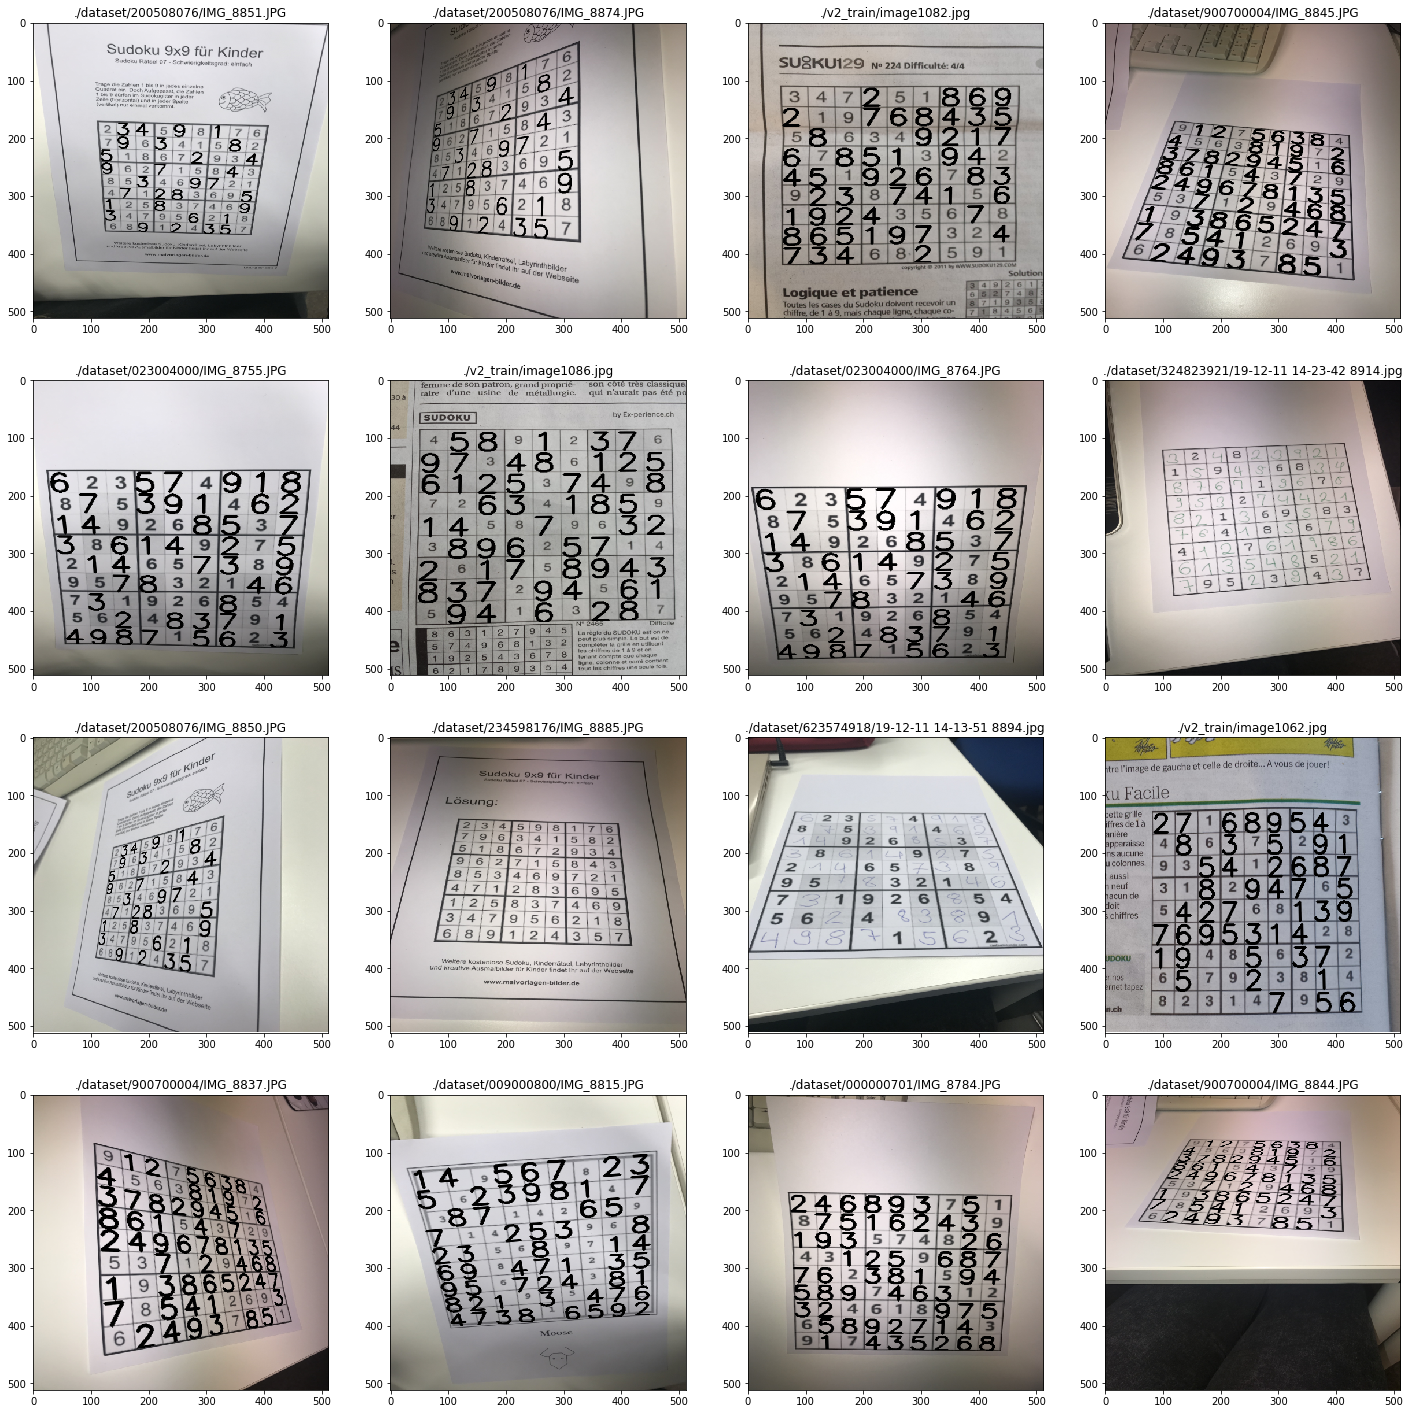

In [131]:
show_images(dataset["ar_input_image"], dataset.index, n_samples=16)